# K-평균 (K-means)

* 비지도학습
* 종속변수 없음


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
dataset = pd.read_csv('./data/ScikitLearn/KMeansData.csv')
dataset.head()

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [53]:
##X = dataset.iloc[:,:].values
X = dataset.values
#X = dataset.to_numpy()  # 공식 홈 권장방식
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화  - 전체 데이터 분포 확인

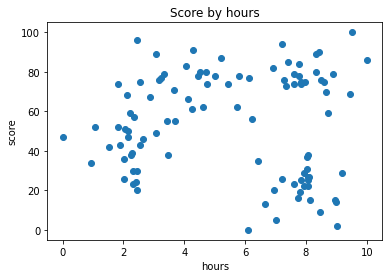

In [54]:
plt.scatter(X[:,0],X[:,1]) # x축 = 시간, y축 = 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 - 축 범위 통일

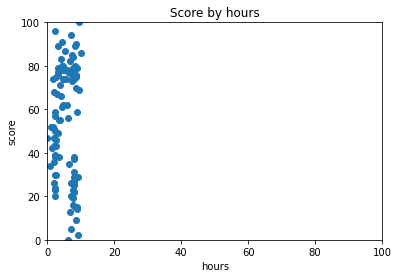

In [55]:

plt.scatter(X[:,0],X[:,1]) # x축 = 시간, y축 = 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0,100)
plt.ylabel('score')
plt.ylim(0,100)
plt.show()


### 피쳐 스케일링 (Feature Scaling)

In [56]:
### 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 - 스케일링된 데이터

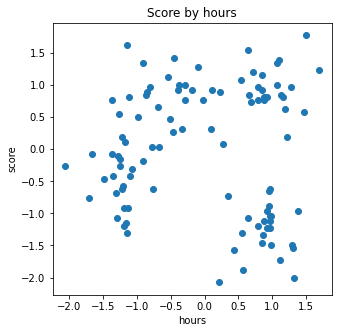

In [57]:
### 실거리를 시각화하기 위해 x,y 축의 scale을 통일해야함
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1]) # x축 = 시간, y축 = 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 K 값 찾기 - 엘보우 방식 (Elbow Method)

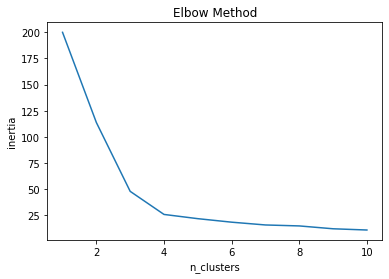

In [58]:
## 클러스터 개수당, 거리제곱합
## 엘보우 지점을 찾아서 K값으로 선정
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터 중심까지의 거리 제곱합
    
plt.plot(range(1,11),inertia_list)
plt.title("Elbow Method")
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(4)값으로 KMeans 학습

In [59]:
K = 4 # 최적의 k값
kmeans = KMeans(n_clusters=K,random_state=0)
#kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

## 총 4개의 클러스터로 구분되는것이 확인된다.

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

### 데이터 시각화(최적의 K)

In [60]:
centers = kmeans.cluster_centers_ 
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

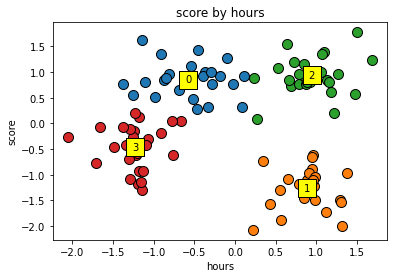

In [61]:
for cluster in range(K):
    plt.scatter(X[y_kmeans ==cluster,0],X[y_kmeans==cluster,1],s=100,edgecolor='black')
    plt.scatter(centers[cluster,0],centers[cluster,1],s=300,edgecolor='black', color='yellow', marker='s')
    plt.text(centers[cluster,0],centers[cluster,1],cluster,va='center',ha='center')
    
    
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 - 스케일링 원상복구

In [62]:
X_org = sc.inverse_transform(X) # 다시 원상복구하는 작업
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [63]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

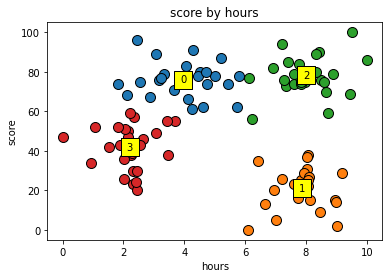

In [64]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans ==cluster,0],X_org[y_kmeans==cluster,1],s=100,edgecolor='black')
    plt.scatter(centers_org[cluster,0],centers_org[cluster,1],s=300,edgecolor='black', color='yellow', marker='s')
    plt.text(centers_org[cluster,0],centers_org[cluster,1],cluster,va='center',ha='center')
    
    
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

#### 해당 시각화 자료를 분석?
0번 그룹 : 공부 효율 좋은 그룹 <br>
1번 그룹 : 공부 효율 안좋은 그룹 <br>
2번 그룹 : 한 만큼 잘 나오는 그룹 <br>
3번 그룹 : 안한 만큼 안나오는 그룹 <br>